# Machine learning Theory DA: Comparing two algorithms on any dataset: 
# Dataset used: https://github.com/avisharma7/Machine-learning/tree/main/Theory%20DA

# Aviral Sharma 20BCE2918

# Linear Regression on Vegetable prices 2020 dataset


In [58]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [62]:
# Step 2: Load the dataset
vegetable_data = pd.read_csv('Vegetable prices 2020.csv')
vegetable_data

,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.1804,per pound,0.4586,0.4519,pounds,1.1633
1,Artichoke,Fresh,2.1913,per pound,0.3750,0.3858,pounds,2.2545
2,Artichoke,Canned,3.4119,per pound,0.6500,0.3858,pounds,2.0251
3,Asparagus,Fresh,2.7576,per pound,0.4938,0.3968,pounds,2.2159
4,Asparagus,Canned,3.1269,per pound,0.6500,0.3968,pounds,1.9090
...,...,...,...,...,...,...,...,...
88,Tomatoes,Canned,1.0175,per pound,1.0000,0.5401,pounds,0.5496
89,Turnip greens,Fresh,2.4176,per pound,0.7500,0.3197,pounds,1.0304
90,Turnip greens,Canned,1.0429,per pound,0.6500,0.3527,pounds,0.5660
91,Turnip greens,Frozen,1.9451,per pound,0.7760,0.3527,pounds,0.8841


In [63]:
# Step 3: Explore the dataset
# Check for any missing values and basic statistics
print(vegetable_data.info())
print(vegetable_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Vegetable           93 non-null     object 
 1   Form                93 non-null     object 
 2   RetailPrice         93 non-null     float64
 3   RetailPriceUnit     93 non-null     object 
 4   Yield               93 non-null     float64
 5   CupEquivalentSize   93 non-null     float64
 6   CupEquivalentUnit   93 non-null     object 
 7   CupEquivalentPrice  93 non-null     float64
dtypes: float64(4), object(4)
memory usage: 5.9+ KB
None
       RetailPrice      Yield  CupEquivalentSize  CupEquivalentPrice
count    93.000000  93.000000          93.000000           93.000000
mean      1.888555   0.959997           0.338635            0.743654
std       1.009724   0.494943           0.066544            0.470496
min       0.668200   0.375000           0.154300            0.202100
25%   

In [64]:
# Step 4: Select features and target variable
# Assuming we want to predict 'RetailPrice' based on 'CupEquivalentPrice'
X = vegetable_data[['CupEquivalentPrice']] #independent variable
y = vegetable_data['RetailPrice']   #dependent variable

In [65]:
X

,CupEquivalentPrice
0,1.1633
1,2.2545
2,2.0251
3,2.2159
4,1.9090
...,...
88,0.5496
89,1.0304
90,0.5660
91,0.8841


In [66]:
y

0     1.1804
1     2.1913
2     3.4119
3     2.7576
4     3.1269
       ...  
88    1.0175
89    2.4176
90    1.0429
91    1.9451
92    1.5489
Name: RetailPrice, Length: 93, dtype: float64

In [67]:
# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Step 6: Create a linear regression model
model = LinearRegression()

In [69]:
# Step 7: Train the model
model.fit(X_train, y_train)


LinearRegression()

In [70]:
# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

In [71]:
y_pred

array([1.18418658, 1.19101376, 2.02579262, 1.57799117, 2.57786384,
       2.3531873 , 1.70258735, 1.13515496, 1.70103572, 1.82671803,
       2.37134142, 1.66612396, 1.65107312, 1.6236092 , 2.23029792,
       3.73491699, 1.23570081, 1.68955363, 1.66783076])

In [72]:
y_test

40    1.6965
22    0.8703
55    1.4004
72    0.8742
0     1.1804
26    3.5859
39    1.0095
67    1.4942
10    1.0375
44    1.2516
83    2.1330
35    1.0287
90    1.0429
62    3.4464
12    2.7486
4     3.1269
18    0.7025
28    1.9946
49    0.9719
Name: RetailPrice, dtype: float64

In [73]:
# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.6189539159297247
Root Mean Squared Error: 0.7867362429237162
Mean Absolute Error: 0.6868631561434799
R-squared: 0.23071617871956862


In [74]:
# Display the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [1.55163356]
Intercept: 0.7728485178254159


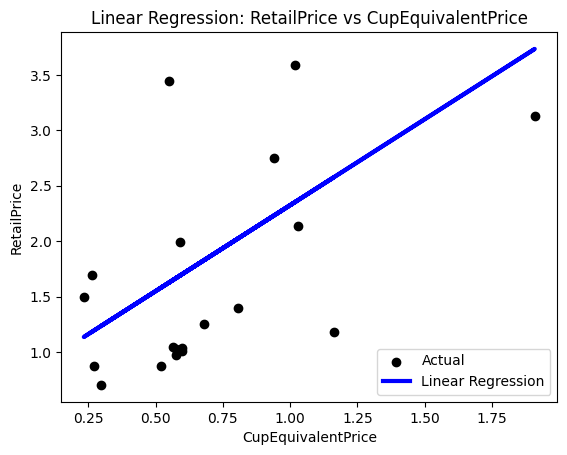

In [75]:
# Step 10: Visualize the linear regression line
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression')
plt.title('Linear Regression: RetailPrice vs CupEquivalentPrice')
plt.xlabel('CupEquivalentPrice')
plt.ylabel('RetailPrice')
plt.legend()
plt.show()

# Now doing Support vector regressor on it

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [77]:
# Step 1: Load the dataset
vegetable_data = pd.read_csv('vegetable Prices 2020.csv')
vegetable_data

,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.1804,per pound,0.4586,0.4519,pounds,1.1633
1,Artichoke,Fresh,2.1913,per pound,0.3750,0.3858,pounds,2.2545
2,Artichoke,Canned,3.4119,per pound,0.6500,0.3858,pounds,2.0251
3,Asparagus,Fresh,2.7576,per pound,0.4938,0.3968,pounds,2.2159
4,Asparagus,Canned,3.1269,per pound,0.6500,0.3968,pounds,1.9090
...,...,...,...,...,...,...,...,...
88,Tomatoes,Canned,1.0175,per pound,1.0000,0.5401,pounds,0.5496
89,Turnip greens,Fresh,2.4176,per pound,0.7500,0.3197,pounds,1.0304
90,Turnip greens,Canned,1.0429,per pound,0.6500,0.3527,pounds,0.5660
91,Turnip greens,Frozen,1.9451,per pound,0.7760,0.3527,pounds,0.8841


In [78]:
# Step 2: Select features and target variable
# Assuming we want to predict 'RetailPrice' based on 'CupEquivalentPrice'
X = vegetable_data[['CupEquivalentPrice']]  # this is our independent variable
y = vegetable_data['RetailPrice'] # this is our dependent variable

In [79]:
X

,CupEquivalentPrice
0,1.1633
1,2.2545
2,2.0251
3,2.2159
4,1.9090
...,...
88,0.5496
89,1.0304
90,0.5660
91,0.8841


In [80]:
y

0     1.1804
1     2.1913
2     3.4119
3     2.7576
4     3.1269
       ...  
88    1.0175
89    2.4176
90    1.0429
91    1.9451
92    1.5489
Name: RetailPrice, Length: 93, dtype: float64

In [81]:
# Step 3: Preprocess the data (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.89675663],
       [ 3.22857985],
       [ 2.73836701],
       [ 3.14609417],
       [ 2.49026889],
       [ 3.91175789],
       [ 0.47364355],
       [-0.02618549],
       [-0.28518199],
       [-1.1299123 ],
       [-0.3108252 ],
       [-1.0183643 ],
       [ 0.41808324],
       [ 0.570233  ],
       [ 0.19477356],
       [ 0.26358286],
       [ 0.40483425],
       [ 0.07809692],
       [-0.95169194],
       [-0.5926869 ],
       [-0.28796   ],
       [-0.86044483],
       [-1.01323566],
       [-0.84035764],
       [-0.39993538],
       [-0.42066365],
       [ 0.58732848],
       [-0.28496829],
       [-0.32663852],
       [-0.82689495],
       [-0.23004907],
       [-0.17320661],
       [-0.34330661],
       [ 0.08749944],
       [ 1.13267423],
       [-0.35890624],
       [-0.24586239],
       [-0.89356731],
       [-0.66491529],
       [-0.30868827],
       [-1.02263817],
       [-0.09606326],
       [-0.59354167],
       [-0.21850962],
       [-0.13773349],
       [ 0

In [82]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [83]:
#testing dataset
X_test

array([[-1.02263817],
       [-1.01323566],
       [ 0.13643524],
       [-0.48028413],
       [ 0.89675663],
       [ 0.58732848],
       [-0.30868827],
       [-1.09016531],
       [-0.3108252 ],
       [-0.13773349],
       [ 0.61233061],
       [-0.35890624],
       [-0.3796345 ],
       [-0.41745825],
       [ 0.41808324],
       [ 2.49026889],
       [-0.95169194],
       [-0.32663852],
       [-0.35655561]])

In [84]:
y_test

40    1.6965
22    0.8703
55    1.4004
72    0.8742
0     1.1804
26    3.5859
39    1.0095
67    1.4942
10    1.0375
44    1.2516
83    2.1330
35    1.0287
90    1.0429
62    3.4464
12    2.7486
4     3.1269
18    0.7025
28    1.9946
49    0.9719
Name: RetailPrice, dtype: float64

In [85]:
#Training dataset
X_train

array([[ 0.23366577],
       [ 0.26358286],
       [ 2.30991159],
       [-0.55721378],
       [-0.23004907],
       [ 0.08749944],
       [-1.0183643 ],
       [-0.25825661],
       [ 0.06356577],
       [-0.17320661],
       [ 0.73926454],
       [-1.1299123 ],
       [ 2.08190065],
       [ 3.91175789],
       [-0.59354167],
       [-0.12982683],
       [ 0.40483425],
       [ 0.01035609],
       [ 1.13267423],
       [-0.02618549],
       [ 1.15874483],
       [-0.28496829],
       [-0.5926869 ],
       [-0.34544355],
       [-0.42066365],
       [-0.71791128],
       [ 0.570233  ],
       [-0.39993538],
       [ 3.14609417],
       [ 0.07809692],
       [-0.66491529],
       [-0.28518199],
       [-1.15726506],
       [ 0.47364355],
       [ 0.612758  ],
       [-0.24586239],
       [ 0.46573689],
       [-0.20248261],
       [ 0.11763022],
       [-0.2323997 ],
       [-0.21850962],
       [-1.01430413],
       [-0.14264844],
       [-0.70850876],
       [-0.44801642],
       [-0

In [86]:
y_train

65    1.9288
15    2.6895
68    3.9803
78    1.5770
30    2.4041
       ...  
20    1.2823
60    1.5978
71    0.9751
14    2.1543
51    1.6493
Name: RetailPrice, Length: 74, dtype: float64

In [87]:

# Step 5: Create a Support Vector Regressor model
svr_model = SVR()

In [88]:
# Step 6: Train the model
svr_model.fit(X_train, y_train)

SVR()

In [89]:
# Step 7: Make predictions on the test set
svr_y_pred = svr_model.predict(X_test)

In [90]:
svr_y_pred

array([1.30933378, 1.3049333 , 1.97281919, 1.40054418, 2.56019318,
       2.29970491, 1.54821169, 1.34666929, 1.54619143, 1.71604237,
       2.31731608, 1.50169275, 1.48316181, 1.45056493, 2.18477936,
       3.71163337, 1.28120868, 1.53134612, 1.50382118])

In [91]:
y_test

40    1.6965
22    0.8703
55    1.4004
72    0.8742
0     1.1804
26    3.5859
39    1.0095
67    1.4942
10    1.0375
44    1.2516
83    2.1330
35    1.0287
90    1.0429
62    3.4464
12    2.7486
4     3.1269
18    0.7025
28    1.9946
49    0.9719
Name: RetailPrice, dtype: float64

In [93]:
# Step 8: Evaluate the model
mse = mean_squared_error(y_test, svr_y_pred)
r2 = r2_score(y_test, svr_y_pred)
mae= mean_absolute_error(y_test, svr_y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


# Display the evaluation metrics
print('Mean Squared Error:', mse)
print('root mean Squared Error:', rmse)
print('R-squared:', r2)
print('Mean absolute error:',mae)


Mean Squared Error: 0.5902747105585908
root mean Squared Error: 0.7867362429237162
R-squared: 0.26636091434750686
Mean absolute error: 0.6348300415730124


In [94]:
# Step 9: Display Support Vectors and Dual Coefficients
support_vectors = svr_model.support_vectors_
dual_coefficients = svr_model.dual_coef_

print('\nSupport Vectors:')
print(support_vectors)
print('\nDual Coefficients:')
print(dual_coefficients)


Support Vectors:
[[ 0.23366577]
 [ 0.26358286]
 [-0.55721378]
 [-0.23004907]
 [-1.0183643 ]
 [-0.25825661]
 [-0.17320661]
 [ 0.73926454]
 [ 2.08190065]
 [ 3.91175789]
 [-0.59354167]
 [-0.12982683]
 [ 0.40483425]
 [ 1.13267423]
 [-0.02618549]
 [ 1.15874483]
 [-0.28496829]
 [-0.5926869 ]
 [-0.34544355]
 [-0.42066365]
 [-0.71791128]
 [-0.39993538]
 [ 3.14609417]
 [ 0.07809692]
 [-0.66491529]
 [-0.28518199]
 [-1.15726506]
 [ 0.612758  ]
 [ 0.46573689]
 [-0.20248261]
 [ 0.11763022]
 [-0.2323997 ]
 [-0.21850962]
 [-1.01430413]
 [-0.14264844]
 [-0.44801642]
 [-0.21872332]
 [ 0.30012445]
 [-0.39266981]
 [-0.09606326]
 [ 0.12126301]
 [-0.60166203]
 [-0.87946355]
 [-0.34330661]
 [-0.41468023]
 [-0.46917207]
 [-0.38818224]
 [-0.09905497]
 [-0.82689495]
 [ 3.22857985]
 [-1.04635815]
 [-0.86044483]
 [ 2.05967653]
 [-1.1235015 ]
 [-0.5666163 ]
 [ 0.03172544]
 [-0.28796   ]
 [-0.41339807]
 [-0.77240311]
 [ 0.19477356]
 [-1.03845149]]

Dual Coefficients:
[[-1.          1.          1.          1.     

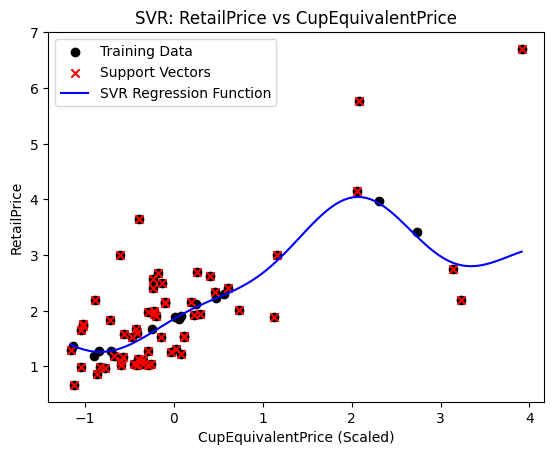

In [95]:
# Step 10:
#Generate data for visualization
X_vis = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
y_vis = svr_model.predict(X_vis)

# Visualize the SVR predictions, support vectors, and regression function
plt.scatter(X_train, y_train, color='black', label='Training Data')
plt.scatter(svr_model.support_vectors_, y_train.iloc[svr_model.support_], color='red', marker='x', label='Support Vectors')
plt.plot(X_vis, y_vis, color='blue', label='SVR Regression Function')
plt.title('SVR: RetailPrice vs CupEquivalentPrice')
plt.xlabel('CupEquivalentPrice (Scaled)')
plt.ylabel('RetailPrice')
plt.legend()
plt.show()

# Linear Regression Metrics:

# Support Vector Regression (SVR) Metrics:

# Detailed Analysis:

 #   Conclusion and Recommendation: